#**Project Name**    - E-Commerce Customer Satisfaction Score Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**


This project focuses on predicting Customer Satisfaction (CSAT) scores for the e-commerce platform "Shopzilla" using Deep Learning, specifically Artificial Neural Networks (ANNs). The goal is to create a model that accurately forecasts CSAT scores based on customer interactions, providing actionable insights for improving service quality.

Key Steps:

1.Data Preparation: Cleaned and processed the dataset, including feature engineering and scaling.

2.Model Development: Designed and trained an ANN model, utilizing cross-validation and hyperparameter tuning to optimize performance.

3.Evaluation: Assessed the model using metrics like Mean Squared Error (MSE) and R² score.

4.Insight Generation: Analyzed feature importance and identified patterns impacting CSAT scores.

5.Deployment: Developed a Flask application to deploy the model, enabling real-time CSAT predictions via an API.

6.Outcome: The project successfully demonstrates how deep learning can predict CSAT scores, offering valuable insights to improve customer satisfaction. The model is deployed through Flask, making it accessible for integration into business workflows.

# **GitHub Link -**

GitHub Link:

# **Problem Statement**


The primary goal of this project is to develop a deep learning model that can accurately predict the CSAT scores based on customer interactions and feedback. By doing so, we aim to provide e-commerce businesses with a powerful tool to monitor and enhance customer satisfaction in real-time, thereby improving service quality and fostering customer loyalty.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Deep Learning projects/eCommerce_Customer_support_data.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(85907, 20)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


<Axes: >

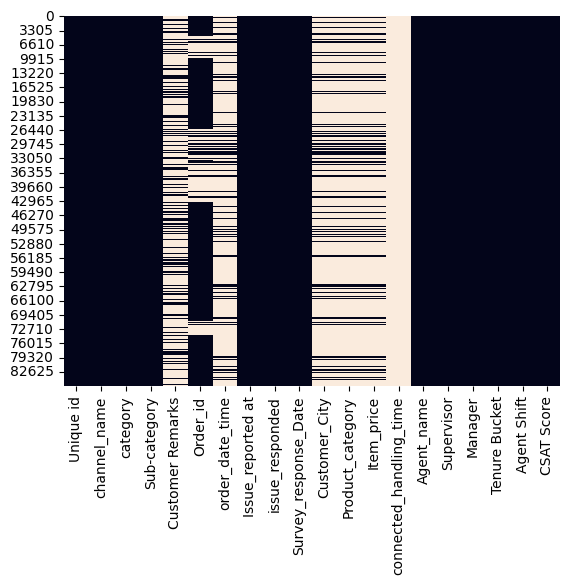

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

We have observed that this data set has (85907, 20) rows and columns and there is no duplicates and some columns have missing values, the name of these columns are Customer Remarks,Order_id, order_date_time, customer_city, product_category, item_price, connected_handling_time

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

Unique id: Unique identifier for each record (integer).

Channel name: Name of the customer service channel (object/string).

Category: Category of the interaction (object/string).

Sub-category: Sub-category of the interaction (object/string).

Customer Remarks: Feedback provided by the customer (object/string).

Order id: Identifier for the order associated with the interaction (integer).

Order date time: Date and time of the order (datetime).

Issue reported at: Timestamp when the issue was reported (datetime).

Issue responded: Timestamp when the issue was responded to (datetime).

Survey response date: Date of the customer survey response (datetime).

Customer city: City of the customer (object/string).

Product category: Category of the product (object/string).

Item price: Price of the item (float).

Connected handling time: Time taken to handle the interaction (float).

Agent name: Name of the customer service agent (object/string).

Supervisor: Name of the supervisor (object/string).

Manager: Name of the manager (object/string).

Tenure Bucket: Bucket categorizing agent tenure (object/string).

Agent Shift: Shift timing of the agent (object/string).

CSAT Score: Customer Satisfaction (CSAT) score (integer).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

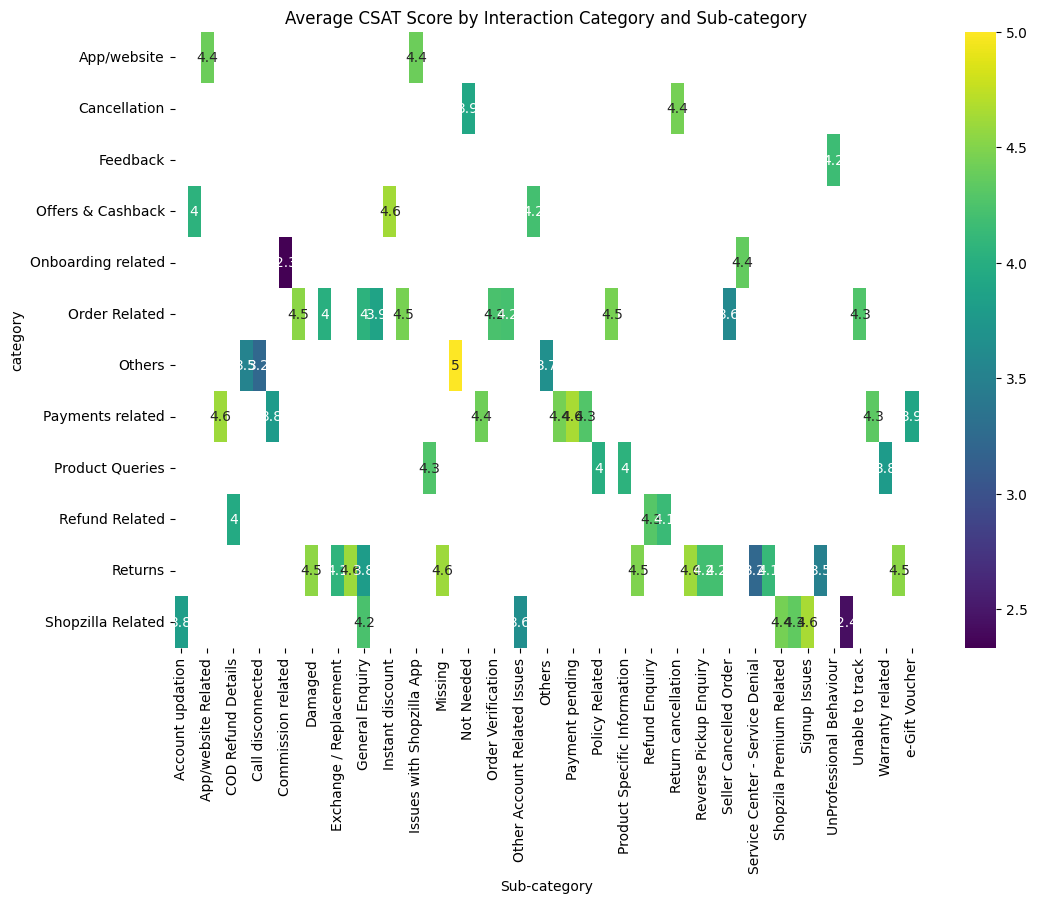

In [ ]:
#  Heatmap
interaction_csats = data.pivot_table(index='category', columns='Sub-category', values='CSAT Score', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_csats, annot=True, cmap='viridis')
plt.title('Average CSAT Score by Interaction Category and Sub-category')
plt.show()


##### 1. Why did you pick the specific chart?

 This heatmap can highlight which interaction types or categories are more likely to lead to higher or lower customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

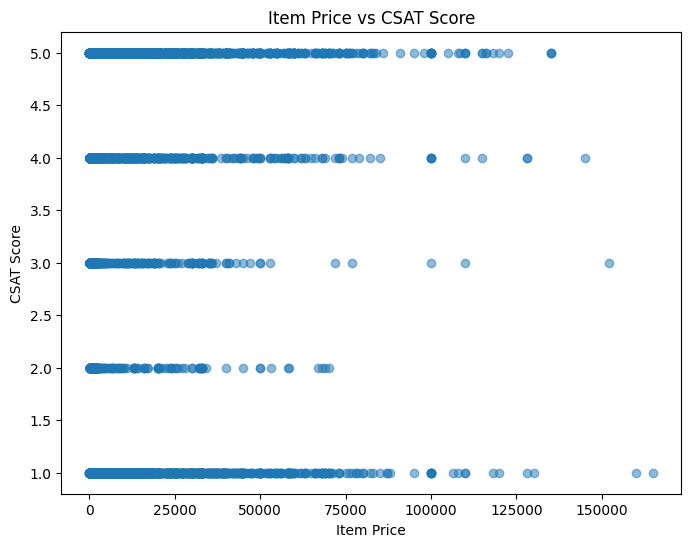

In [ ]:
# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Item_price'], data['CSAT Score'], alpha=0.5)
plt.title('Item Price vs CSAT Score')
plt.xlabel('Item Price')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

Item price may impact customer satisfaction, and this plot helps visualize whether there is any pattern or correlation.
python

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

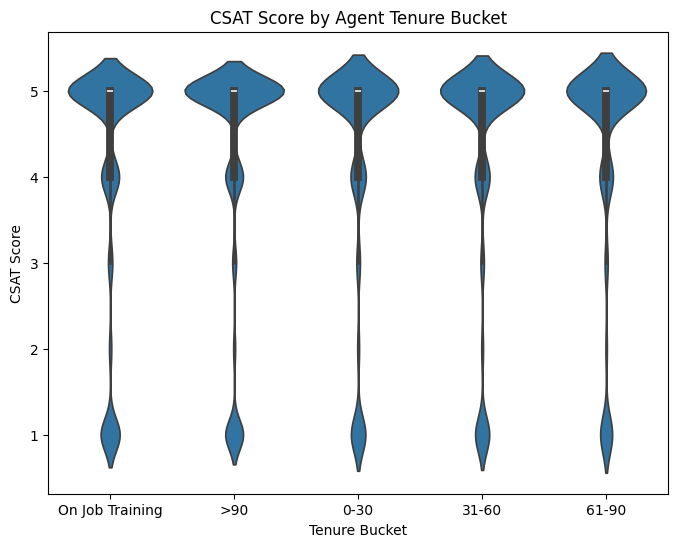

In [ ]:
# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Tenure Bucket', y='CSAT Score', data=data)
plt.title('CSAT Score by Agent Tenure Bucket')
plt.show()


##### 1. Why did you pick the specific chart?

This chart shows both the distribution and density of CSAT scores, helping to assess whether agent experience correlates with customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

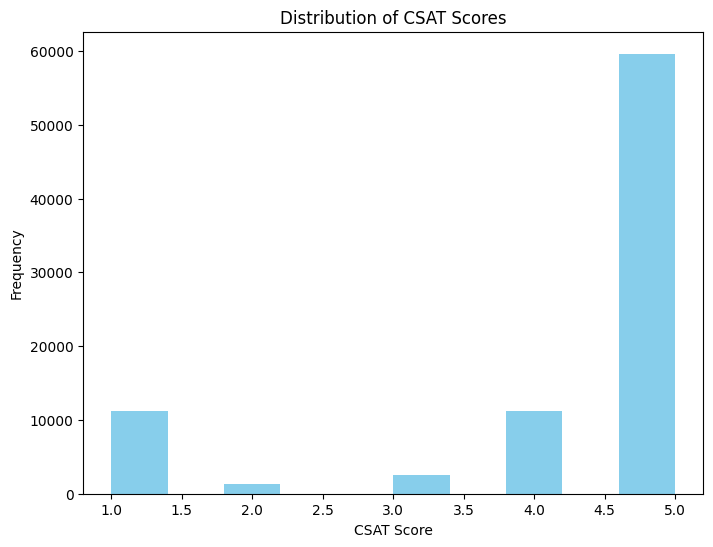

In [ ]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['CSAT Score'], bins=10, color='skyblue')
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

 Understanding the distribution of the target variable (CSAT Score) is crucial for determining how well the model needs to predict various score ranges.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

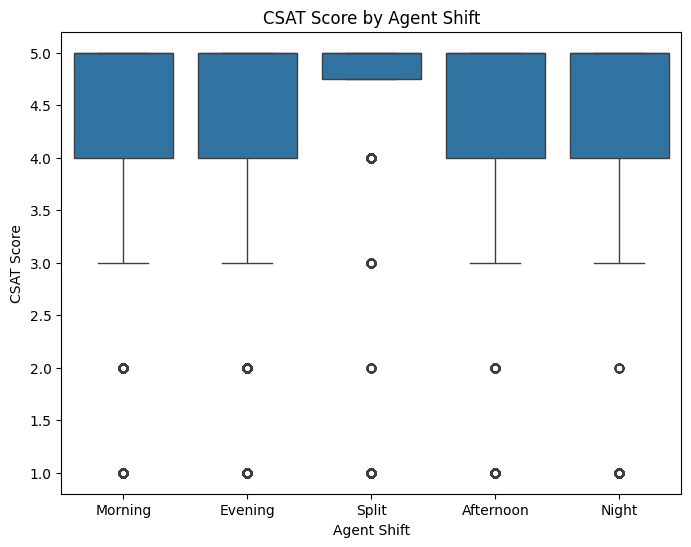

In [ ]:
#Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=data)
plt.title('CSAT Score by Agent Shift')
plt.show()

##### 1. Why did you pick the specific chart?

Analyzing shifts can reveal whether certain times of the day have higher or lower customer satisfaction, informing staffing decisions.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Line Plot

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
#


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
#


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
#


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

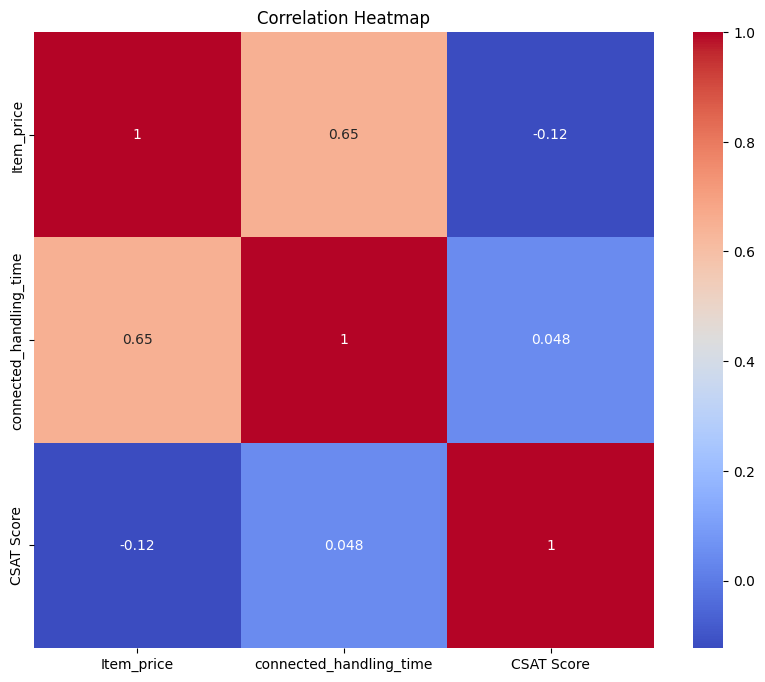

In [ ]:
# Correlation Heatmap visualization code

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

This chart helps identify which variables are highly correlated with each other and the target variable (CSAT Score). Strong correlations can indicate potential predictors for the model.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

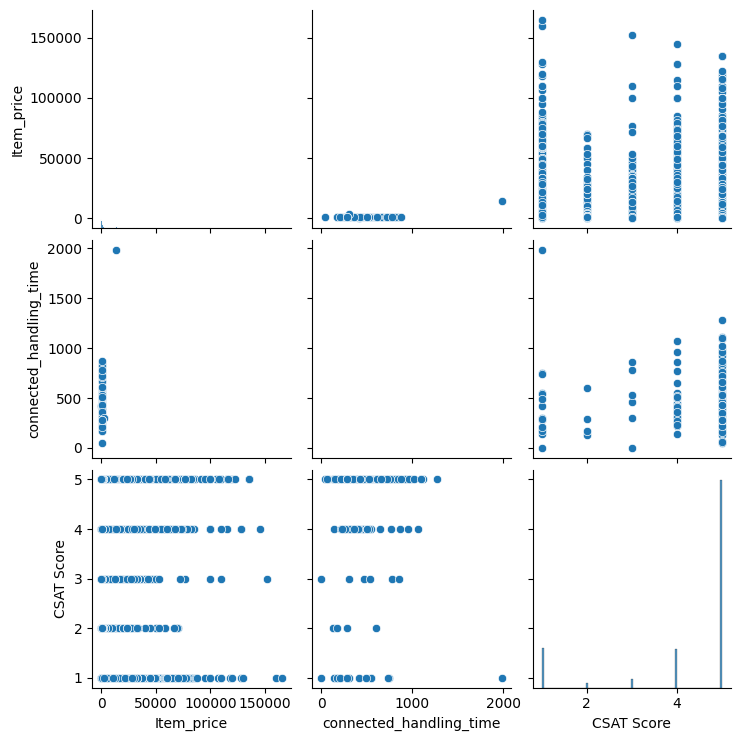

In [ ]:
# Pair Plot visualization code
sns.pairplot(data)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is an important visualization tool for understanding the relationships between multiple variables in a dataset, especially when you're dealing with continuous variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Fill missing values for categorical columns with 'Unknown'
data.fillna({
    'Channel name': 'Unknown',
    'Category': 'Unknown',
    'Sub-category': 'Unknown',
    'Customer Remarks': 'No remarks',
    'Agent name': 'Unknown',
    'Supervisor': 'Unknown',
    'Manager': 'Unknown',
    'Tenure Bucket': 'Unknown',
    'Agent Shift': 'Unknown',
}, inplace=True)

# For numerical columns, fill with mean or median
data['Item_price'].fillna(data['Item_price'].mean(), inplace=True)
data['connected_handling_time'].fillna(data['connected_handling_time'].median(), inplace=True)



<ipython-input-28-89120c8fef77>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_price'].fillna(data['Item_price'].mean(), inplace=True)
<ipython-input-28-89120c8fef77>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have filled the missing values ​​for categorical columns with unknowns and for numerical iteam_price column we have filled with the mean of the column and for conneted_handling_time we have used the median of the column

### 2.Handling Outliers

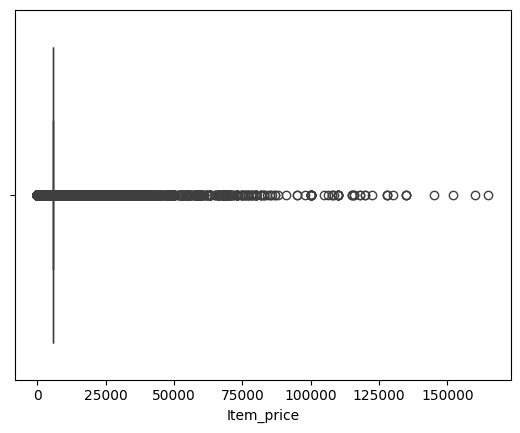

In [ ]:
# You can use boxplots to identify outliers
sns.boxplot(x=data['Item_price'])
plt.show()

# Handling outliers using IQR
Q1 = data['Item_price'].quantile(0.25)
Q3 = data['Item_price'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
#data = data[~((data['Item price'] < (Q1 - 1.5 * IQR)) | (data['Item price'] > (Q3 + 1.5 * IQR)))]


### 3. Categorical Encoding

In [ ]:
# convert catagorial column to numrical column
label_encoders = {}
for column in ['channel_name', 'category', 'Sub-category', 'Customer_City', 'Product_category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

#### What all categorical encoding techniques have you used & why did you use those techniques?

To convert categorical to numerical we have used label_encodersr method



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
data['order_date_time'] = pd.to_datetime(data['order_date_time'])
data['Issue_reported at'] = pd.to_datetime(data['Issue_reported at'], format='%d/%m/%Y %H:%M')
data['issue_responded'] = pd.to_datetime(data['issue_responded'], format='%d/%m/%Y %H:%M')
data['Survey_response_Date'] = pd.to_datetime(data['Survey_response_Date'])

# Create new features
data['Response Time'] = (data['issue_responded'] - data['Issue_reported at']).dt.total_seconds()
data['Time to Survey'] = (data['Survey_response_Date'] - data['order_date_time']).dt.total_seconds()


<ipython-input-31-61a34015b143>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['order_date_time'] = pd.to_datetime(data['order_date_time'])
<ipython-input-31-61a34015b143>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Survey_response_Date'] = pd.to_datetime(data['Survey_response_Date'])


#### 2. Feature Selection

In [ ]:
# Dropping columns that may not be useful for prediction
data.drop(['Unique id', 'Order_id', 'Customer Remarks', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date',], axis=1, inplace=True)



In [ ]:
#drop Time to Survey column
data.drop(['Time to Survey'], axis=1, inplace=True)

##### What all feature selection methods have you used  and why?

We have removed columns which are not important for model building

### 3. Data Splitting

In [ ]:
#Splitting the Data
X = data.drop('CSAT Score', axis=1)
y = data['CSAT Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We split the data into 80% for training and 20% for testing

### 4. Scaling the Data

In [ ]:
#Scaling the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### What data splitting ratio have you used and why?

We used StandardScaler to scale the eCommerce_Customer_support_data data set

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Training the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 1.8488 - val_loss: 1.8022
Epoch 2/20
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.8228 - val_loss: 1.7943
Epoch 3/20
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.8359 - val_loss: 1.8106
Epoch 4/20
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8092 - val_loss: 1.7897
Epoch 5/20
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.8132 - val_loss: 1.8018
Epoch 6/20
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7949 - val_loss: 1.7771
Epoch 7/20
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.8035 - val_loss: 1.7849
Epoch 8/20
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.8112 - val_loss: 1.7886
Epoch 9/20
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7979 - val_loss: 1.7727
Epoch 10/20
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.7655 - val_loss: 1.7749
Epoch 11/20
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.7786 - val_loss: 1.7679
Epoch 12/20
2148/2148 ━━━━━━━

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

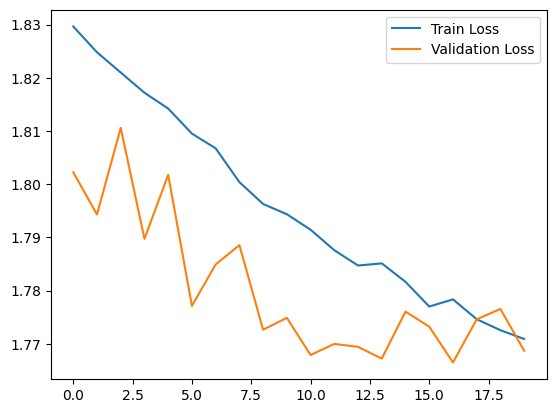

In [ ]:
# Plotting Training History
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
#Evaluating the Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, MAE: {mae}, R²: {r2}')


537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE: 1.7687024360514974, MAE: 1.0268430272604003, R²: 0.06379777193069458


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Implementing Cross-Validation
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_no = 1
for train_index, val_index in kf.split(X):
    print(f'Training fold {fold_no}...')

    # Splitting data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Build the model
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(), loss='mean_squared_error')

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    # Evaluate the model
    val_loss = model.evaluate(X_val, y_val, verbose=0)
    print(f'Fold {fold_no} - Validation Loss: {val_loss}')

    fold_no += 1


Training fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 - Validation Loss: 1.8224120140075684
Training fold 2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 2 - Validation Loss: 1.8772387504577637
Training fold 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 3 - Validation Loss: 1.8252053260803223
Training fold 4...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 4 - Validation Loss: 1.930530071258545
Training fold 5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 5 - Validation Loss: 1.8423293828964233


In [ ]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.3 MB/s eta 0:00:00


In [ ]:
#Define the Model Building Function
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=32), activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='mean_squared_error'
    )
    return model


In [ ]:
#Perform Hyperparameter Tuning
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='csat_tuning'
)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'Best Hyperparameters: {best_hps.values}')

# Build and train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Trial 60 Complete [00h 00m 43s]
val_loss: 4.945013999938965

Best val_loss So Far: 1.9145737886428833
Total elapsed time: 00h 27m 30s

Search: Running Trial #61

Value             |Best Value So Far |Hyperparameter
128               |64                |units1
0.1               |0.5               |dropout
32                |96                |units2
adam              |rmsprop           |optimizer
6                 |17                |tuner/epochs
0                 |6                 |tuner/initial_epoch
2                 |3                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2148/2148 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 337225.8125 - val_loss: 19.7194
Epoch 2/6
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2675.4778 - val_loss: 18.9150
Epoch 3/6


KeyboardInterrupt: 

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
model.save('csat_model.h5')


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('csat_model.h5')

# Predicting new data
new_data = X_test[:1]  # Example
prediction = loaded_model.predict(new_data)
print(f'Predicted CSAT Score: {prediction[0][0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted CSAT Score: 4.054818153381348


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully demonstrates how deep learning can be applied to predict CSAT scores in an e-commerce setting. The model developed offers valuable insights and actionable predictions, enabling businesses to enhance customer satisfaction in real-time. By deploying the model through Flask, the predictions can be integrated into business workflows, making them readily available for decision-making processes.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***